In [1]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/mnist/train-images-idx3-ubyte.gz")
X_test = open_images("../data/mnist/t10k-images-idx3-ubyte.gz")

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


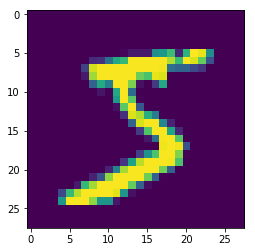

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

In [3]:
X_train = X_train / 255.
X_test = X_test / 255.

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="mse")

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
model.fit(X_train.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1), epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0429
Epoch 2/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0172
Epoch 3/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0160
Epoch 4/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0155
Epoch 5/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0153
Epoch 6/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0151
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0149
Epoch 8/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0149
Epoch 9/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0148
Epoch 10/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0147


In [41]:
image = X_train[0]

image_predicted = model.predict(image.reshape(-1, 28, 28, 1))

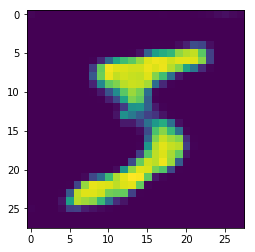

In [42]:
plt.imshow(image_predicted.reshape(28, 28))
plt.show()

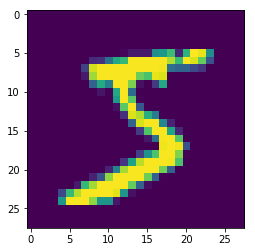

In [43]:
plt.imshow(image)
plt.show()